In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load the data
df = pd.read_csv('earnings_train.csv')

print("-----BASIC OVERVIEW OF DATA SET-----")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

-----BASIC OVERVIEW OF DATA SET-----
Dataset shape: (20705, 11)

First 5 rows:
          DISTRICT_TYPE       DISTRICT_NAME  DISTRICT_CODE ACADEMIC_YEAR  \
0       School District      Duarte Unified      1964469.0     2018-2019   
1       School District    Coronado Unified      3768031.0     2018-2019   
2       School District      Gilroy Unified      4369484.0     2018-2019   
3       School District     Pleasant Valley      5672553.0     2018-2019   
4  Legislative District  Senate District 15            NaN     2018-2019   

     DEMO_CATEGORY                       STUDENT_POPULATION  \
0             Race                            None Reported   
1             Race                            None Reported   
2             Race                Black or African American   
3  Homeless Status  Did Not Experience Homelessness in K-12   
4             Race         American Indian or Alaska Native   

                         AWARD_CATEGORY  WAGE_YEAR1  WAGE_YEAR2  WAGE_YEAR3  \
0  Bac

In [11]:
print("\n------DATA QUALITY------")
#Print data types
print(df.dtypes)
print("\n")

#Print missing values
print("Missing Values per Column:")
print(df.isnull().sum())

#Check for all-zero wage columns
for col in ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']:
    zero_count = (df[col] == 0).sum()
    print(f"{col} has {zero_count} zero entries")


------DATA QUALITY------
DISTRICT_TYPE          object
DISTRICT_NAME          object
DISTRICT_CODE         float64
ACADEMIC_YEAR          object
DEMO_CATEGORY          object
STUDENT_POPULATION     object
AWARD_CATEGORY         object
WAGE_YEAR1            float64
WAGE_YEAR2            float64
WAGE_YEAR3            float64
WAGE_YEAR4            float64
dtype: object


Missing Values per Column:
DISTRICT_TYPE            0
DISTRICT_NAME            0
DISTRICT_CODE         2745
ACADEMIC_YEAR            0
DEMO_CATEGORY            0
STUDENT_POPULATION       0
AWARD_CATEGORY           0
WAGE_YEAR1               0
WAGE_YEAR2               0
WAGE_YEAR3               0
WAGE_YEAR4               0
dtype: int64
WAGE_YEAR1 has 17770 zero entries
WAGE_YEAR2 has 17770 zero entries
WAGE_YEAR3 has 17770 zero entries
WAGE_YEAR4 has 17770 zero entries


In [12]:
print("\n-----RANGE ANALYSIS-----")

#Categorical columns
cat_cols = ['DISTRICT_TYPE', 'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY']
for col in cat_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Sample values: {list(df[col].unique()[:5])}")

#Numeric columns
print("\nWage Statistics:")
print(df[['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']].describe())


-----RANGE ANALYSIS-----

DISTRICT_TYPE:
  Unique values: 3
  Sample values: ['School District', 'Legislative District', 'All']

DEMO_CATEGORY:
  Unique values: 5
  Sample values: ['Race', 'Homeless Status', 'All', 'Foster Status', 'Gender']

STUDENT_POPULATION:
  Unique values: 15
  Sample values: ['None Reported', 'Black or African American', 'Did Not Experience Homelessness in K-12', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']

AWARD_CATEGORY:
  Unique values: 4
  Sample values: ["Bachelor's Degree - Did Not Transfer", 'Associate Degree', 'Community College Certificate', "Bachelor's Degree - Transferred"]

Wage Statistics:
         WAGE_YEAR1     WAGE_YEAR2     WAGE_YEAR3     WAGE_YEAR4
count  20705.000000   20705.000000   20705.000000   20705.000000
mean    4476.106834    6075.533253    7310.831635    8530.890413
std    11944.502346   16140.916903   19158.203471   22106.663179
min        0.000000       0.000000       0.000000       0.000000
25%


-----VISUALIZATIONS-----




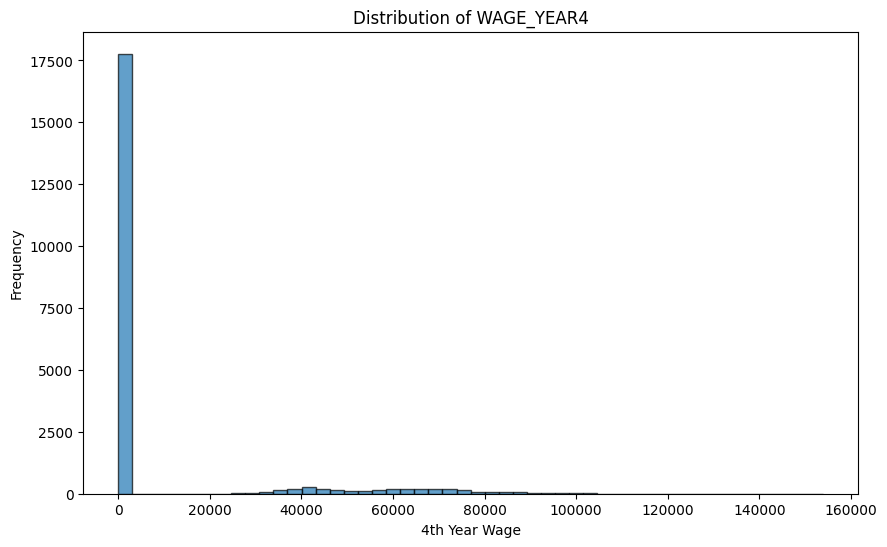

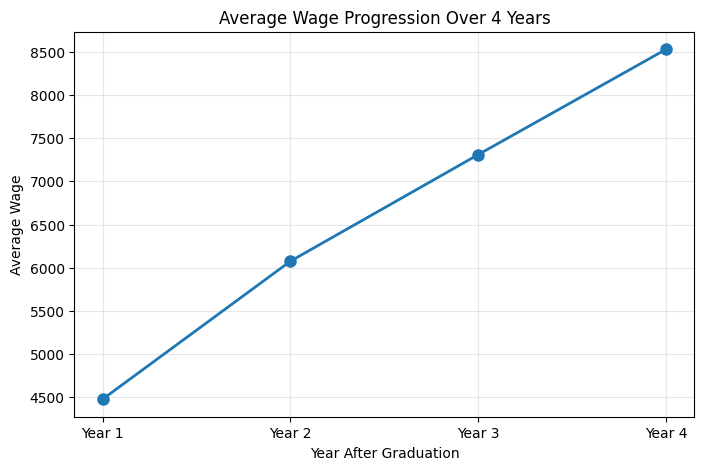

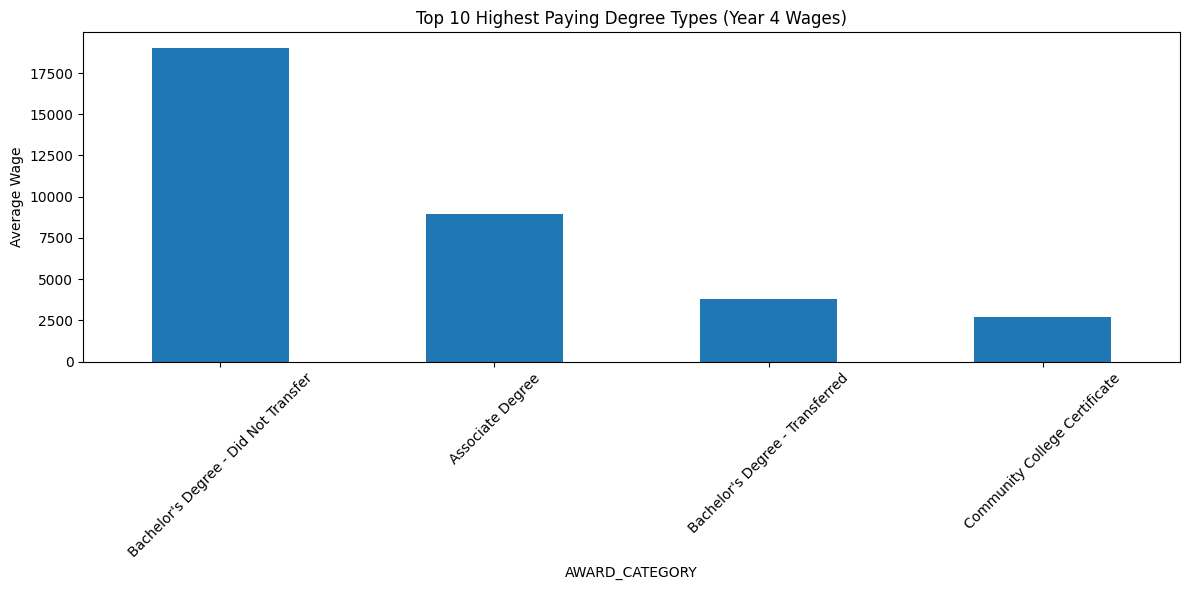

In [13]:
print("\n-----VISUALIZATIONS-----")
print("\n")
#Distribution of target variable
plt.figure(figsize=(10, 6))
plt.hist(df['WAGE_YEAR4'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of WAGE_YEAR4')
plt.xlabel('4th Year Wage')
plt.ylabel('Frequency')
plt.savefig('wage_distribution.png', bbox_inches='tight')
plt.show()

#Wage progression over years
wage_means = df[['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']].mean()
plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), wage_means, marker='o', linewidth=2, markersize=8)
plt.title('Average Wage Progression Over 4 Years')
plt.xlabel('Year After Graduation')
plt.ylabel('Average Wage')
plt.xticks(range(1, 5), ['Year 1', 'Year 2', 'Year 3', 'Year 4'])
plt.grid(True, alpha=0.3)
plt.savefig('wage_progression.png', bbox_inches='tight')
plt.show()

#Top paying degree types
plt.figure(figsize=(12, 6))
top_degrees = df.groupby('AWARD_CATEGORY')['WAGE_YEAR4'].mean().sort_values(ascending=False).head(10)
top_degrees.plot(kind='bar')
plt.title('Top 10 Highest Paying Degree Types (Year 4 Wages)')
plt.ylabel('Average Wage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_degrees.png', bbox_inches='tight')
plt.show()